# Data Manipulation

Data manipulation refers to the process of transforming and restructuring data to make it suitable for analysis or visualization. Pivot tables are a common technique used in data manipulation, especially for summarizing and aggregating data in a structured format.

## Example in Data Frame from File CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ikea.csv')

In [3]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


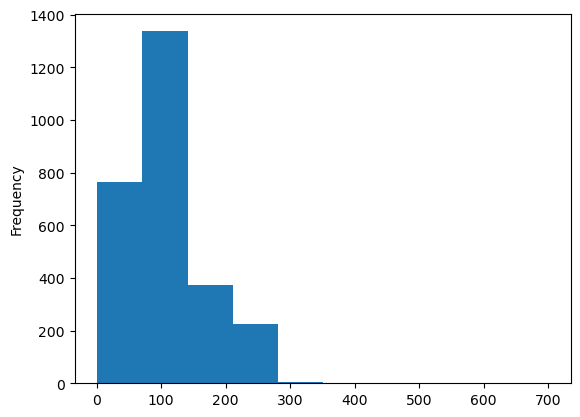

In [5]:
df.height.plot(kind='hist');

In [6]:
# calculating the frequency of occurrence of each value in the 'sellable_online' column."

df.sellable_online[df['price']>265].value_counts()

sellable_online
True     2504
False      12
Name: count, dtype: int64

# in bar view

df.sellable_online[df['price']>265].value_counts().plot(kind='bar')

##  Pivot
In Python, you can create pivot tables using various libraries, but one of the most commonly used ones is pandas. Pandas is a powerful data manipulation library that provides easy-to-use data structures and data analysis tools.

In [7]:
def make_pivot (param1, param2) :
    df_slice = df [[param1, param2, 'item_id']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size, fill_value=0)
    p_chart = slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height()*1.01))
        return slice_pivot
        return p_chart

item_id      
sellable_online                        False True 
category                                          
Bar furniture                              3    44
Beds                                       3   205
Bookcases & shelving units                 1   547
Cabinets & cupboards                       1   291
Café furniture                             0    26
Chairs                                     4   477
Chests of drawers & drawer units           0   125
Children's furniture                       5   119
Nursery furniture                          4    93
Outdoor furniture                          0   216
Room dividers                              0    13
Sideboards, buffets & console tables       0    23
Sofas & armchairs                          1   427
TV & media furniture                       1   189
Tables & desks                             4   608
Trolleys                                   1    27
Wardrobes                                  0   236

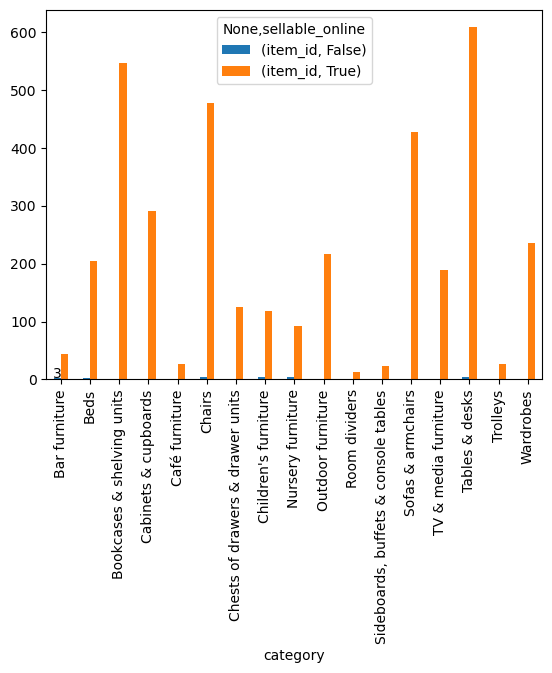

In [8]:
make_pivot('category', 'sellable_online')

## Grouping
In Python, you can use the groupby() method of pandas to perform a “group by” operation on your DataFrame. It allows you to group data based on specific values in one or more columns and then apply aggregation functions to each group.


In [9]:
df[['price', 'sellable_online']].groupby('sellable_online').mean()

,price
sellable_online,
False,445.571429
True,1083.040344


## Crosstab
In Python, you can use the crosstab() function from the pandas library to create a crosstable, also known as a contingency table. This function calculates a simple cross table of two or more factors. This is very useful for analyzing categorical data and understanding the relationships between different variables.

In [10]:
#crosstab by default counts frequencies

pd.crosstab(df.category, df.sellable_online)

sellable_online,False,True
category,,
Bar furniture,3,44
Beds,3,205
Bookcases & shelving units,1,547
Cabinets & cupboards,1,291
Café furniture,0,26
Chairs,4,477
Chests of drawers & drawer units,0,125
Children's furniture,5,119
Nursery furniture,4,93


## Dummies
Dummies or dummy variables are binary representations of a categorical variable in statistical analysis and machine learning. In Python, especially using the pandas library, you can create dummy variables easily using the get_dummies() function.
The result will be a new Data Frame with dummy variables for each unique value in a column. The dummy variable will have the value 1 if the sample has the appropriate value in the category, and 0 if not. Dummy variables help in introducing categorical variables into prediction models, especially in machine learning algorithms that require numerical input.

In [11]:
pd.get_dummies(df.category, 'sellable_online')

,sellable_online_Bar furniture,sellable_online_Beds,sellable_online_Bookcases & shelving units,sellable_online_Cabinets & cupboards,sellable_online_Café furniture,sellable_online_Chairs,sellable_online_Chests of drawers & drawer units,sellable_online_Children's furniture,sellable_online_Nursery furniture,sellable_online_Outdoor furniture,sellable_online_Room dividers,"sellable_online_Sideboards, buffets & console tables",sellable_online_Sofas & armchairs,sellable_online_TV & media furniture,sellable_online_Tables & desks,sellable_online_Trolleys,sellable_online_Wardrobes
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3691,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3692,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Sort
Sorting data in Python refers to arranging the elements of a data structure, such as lists, arrays, or DataFrames, in a specified order. This order can be ascending (from smallest to largest) or descending (from largest to smallest), depending on needs.

In [12]:
df.sort_values('price', ascending=False)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2344,2344,79277632,LIDHULT,Sofas & armchairs,9585.0,No old price,True,https://www.ikea.com/sa/en/p/lidhult-corner-so...,Yes,"Corner sofa-bed, 6-seat",Henrik Preutz/IKEA of Sweden,164.0,102.0,387.0
190,190,29277639,LIDHULT,Beds,9585.0,No old price,True,https://www.ikea.com/sa/en/p/lidhult-corner-so...,Yes,"Corner sofa-bed, 6-seat",Henrik Preutz/IKEA of Sweden,164.0,102.0,387.0
2559,2559,89256610,GRÖNLID,Sofas & armchairs,8900.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,No,"U-shaped sofa, 6 seat",Francis Cayouette,252.0,104.0,327.0
118,118,89186778,KONGSFJORD,Beds,8551.0,"SR 8,735",True,https://www.ikea.com/sa/en/p/kongsfjord-divan-...,Yes,"Divan bed, 180x200 cm",Ola Wihlborg/IKEA of Sweden/Synnöve Mork,NaN,135.0,180.0
2455,2455,49269153,LANDSKRONA,Sofas & armchairs,8495.0,No old price,True,https://www.ikea.com/sa/en/p/landskrona-5-seat...,Yes,5-seat sofa,IKEA of Sweden/Tord Björklund,NaN,78.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,1834,91415,TROFAST,Children's furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
1900,1900,70091412,TROFAST,Nursery furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-storage-b...,No,"Storage box, 20x30x10 cm",Studio Copenhagen,NaN,10.0,30.0
389,389,80336433,GUBBARP,Bookcases & shelving units,3.0,No old price,True,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,Yes,"Knob, 21 mm",H Preutz/A Fredriksson,27.0,NaN,NaN
879,879,80336433,GUBBARP,Cabinets & cupboards,3.0,No old price,True,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,Yes,"Knob, 21 mm",H Preutz/A Fredriksson,27.0,NaN,NaN


## Rename
The rename function in Python, especially when used with pandas, is used to rename a column or index in a DataFrame.

In [13]:
df.rename(columns={'category':'categorize', 'link':'link_item'})

,Unnamed: 0,item_id,name,categorize,price,old_price,sellable_online,link_item,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


## Concat
In Python, especially when working with pandas, the concat() function is used to combine two or more pandas objects along a specific axis (usually a row or column). This function is useful for combining data from several sources into one DataFrame.

In [14]:
df1 = df[['item_id', 'name', 'link']][0:3]

In [15]:
df1

,item_id,name,link
0,90420332,FREKVENS,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...
1,368814,NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-bar-tab...
2,9333523,NORDVIKEN / NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-nordvik...


In [16]:
df2 = df[['item_id', 'name', 'link']][3:8]

In [17]:
df2

,item_id,name,link
3,80155205,STIG,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...
4,30180504,NORBERG,https://www.ikea.com/sa/en/p/norberg-wall-moun...
5,10122647,INGOLF,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...
6,70404875,FRANKLIN,https://www.ikea.com/sa/en/p/franklin-bar-stoo...
7,60155602,DALFRED,https://www.ikea.com/sa/en/p/dalfred-bar-stool...


In [18]:
df_concat = pd.concat ([df1, df2])
df_concat

,item_id,name,link
0,90420332,FREKVENS,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...
1,368814,NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-bar-tab...
2,9333523,NORDVIKEN / NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-nordvik...
3,80155205,STIG,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...
4,30180504,NORBERG,https://www.ikea.com/sa/en/p/norberg-wall-moun...
5,10122647,INGOLF,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...
6,70404875,FRANKLIN,https://www.ikea.com/sa/en/p/franklin-bar-stoo...
7,60155602,DALFRED,https://www.ikea.com/sa/en/p/dalfred-bar-stool...


## Merge
In Python, especially when working with pandas, the merge() function is used to combine two DataFrames by merging them based on one or more keys. This function is similar to SQL join operation.


In [19]:
df3 = df[['item_id', 'name', 'link']][0:3]
df3

,item_id,name,link
0,90420332,FREKVENS,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...
1,368814,NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-bar-tab...
2,9333523,NORDVIKEN / NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-nordvik...


In [20]:
df4 = df[['item_id', 'price', 'sellable_online']][0:3]
df4

,item_id,price,sellable_online
0,90420332,265.0,True
1,368814,995.0,False
2,9333523,2095.0,False


In [21]:
df_merge = pd.merge(df3, df4, how="left", on=["item_id"])
df_merge

,item_id,name,link,price,sellable_online
0,90420332,FREKVENS,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,265.0,True
1,368814,NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,995.0,False
2,9333523,NORDVIKEN / NORDVIKEN,https://www.ikea.com/sa/en/p/nordviken-nordvik...,2095.0,False
